# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [14]:
import pandas as pd

In [28]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [32]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [34]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [38]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [40]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data['purchase_lead'])
plt.show()
sns.boxplot(data['length_of_stay'])
plt.show()


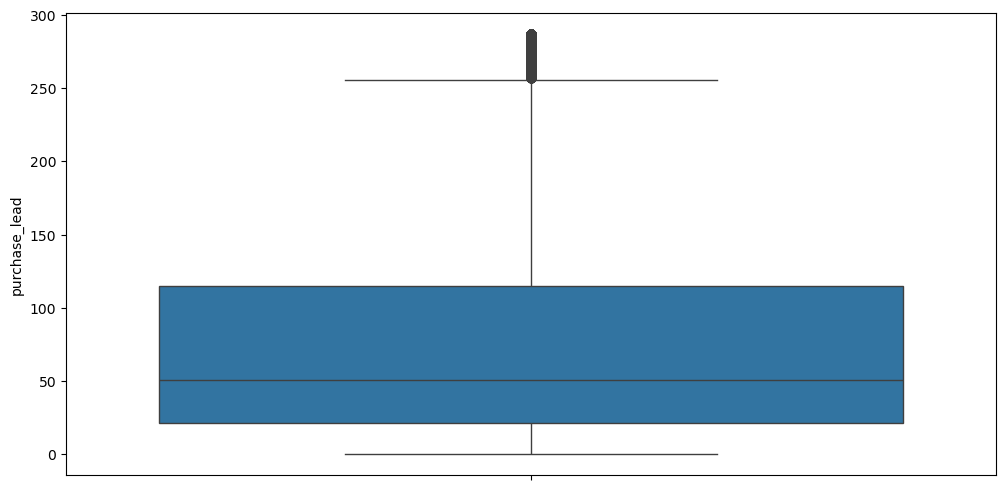

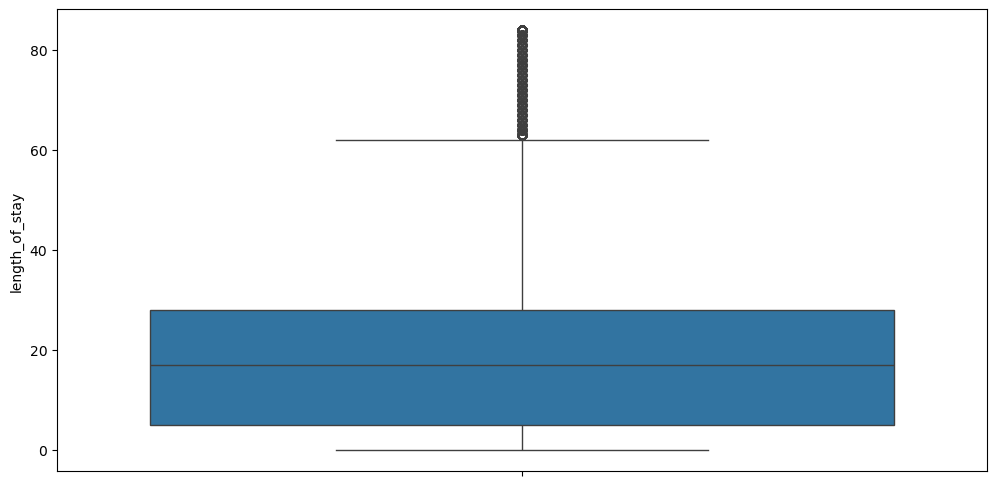

In [64]:
import matplotlib.pyplot as plt  
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(df['purchase_lead'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(df['length_of_stay'])
plt.show()



### Data Cleaning


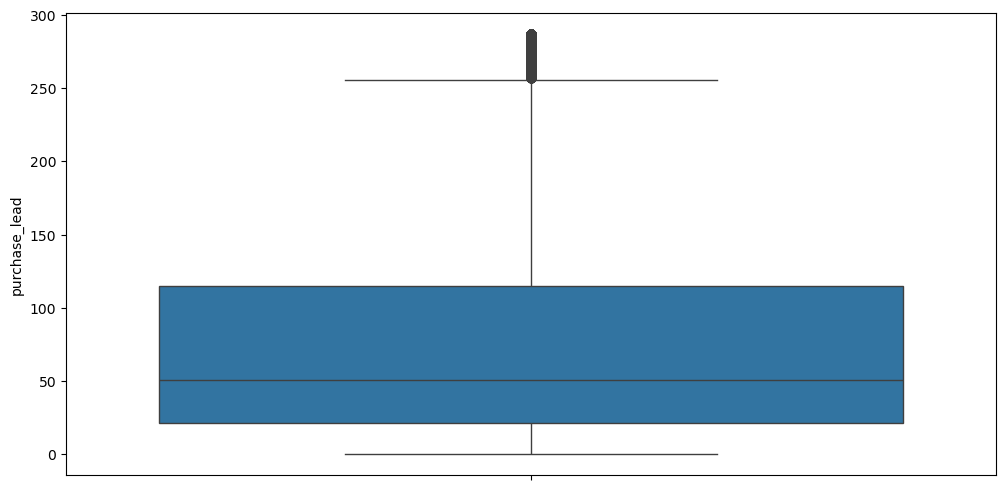

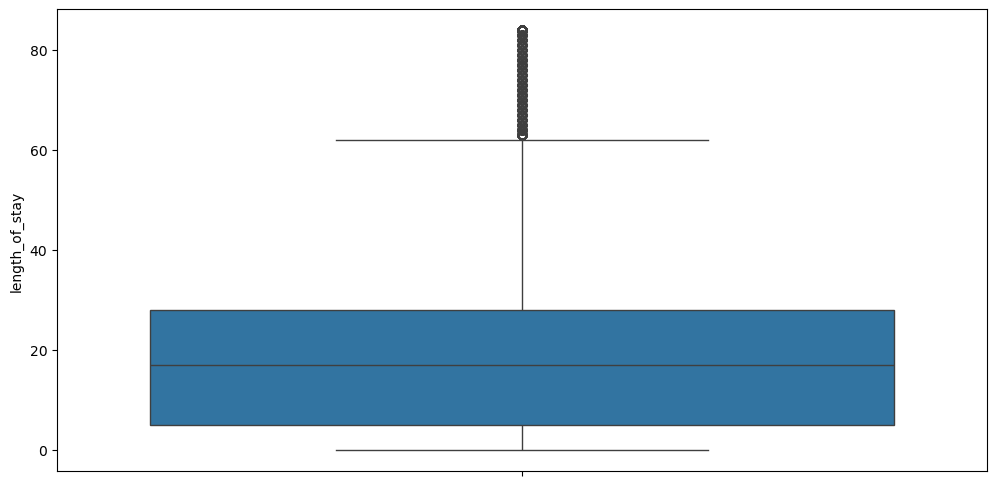

In [70]:
upper_limit_purchase_lead = df['purchase_lead'].quantile(0.95)
df['purchase_lead'] = df['purchase_lead'].apply(lambda x: min(x, upper_limit_purchase_lead))

upper_limit_stay = df['length_of_stay'].quantile(0.95)
df['length_of_stay'] = df['length_of_stay'].apply(lambda x: min(x, upper_limit_stay))

#Visualisation 
plt.figure(figsize=(12, 6))
sns.boxplot(df['purchase_lead'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(df['length_of_stay'])
plt.show()


In [68]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,81.813820,20.684260,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,81.237387,21.830926,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,287.000000,84.000000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Encoding Categorical Variables (one-hot encoding) 

In [76]:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], drop_first=True)


### Feature Scaling 


In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.fit_transform(df[['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])


### Splitting the Data

In [83]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy:  0.856

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.56      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.56     10000
weighted avg       0.82      0.86      0.82     10000



### Handle Class Imbalance

In [105]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.856

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.56      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000



### Cross-Validation 

In [110]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())


Cross-Validation Scores:  [0.848625 0.850875 0.8485   0.845375 0.85375 ]
Mean CV Accuracy:  0.8494249999999999


### Hyperparameter Tunning

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluation on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))


Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score:  0.8509250041885514
Accuracy:  0.8554


### Visualisation 

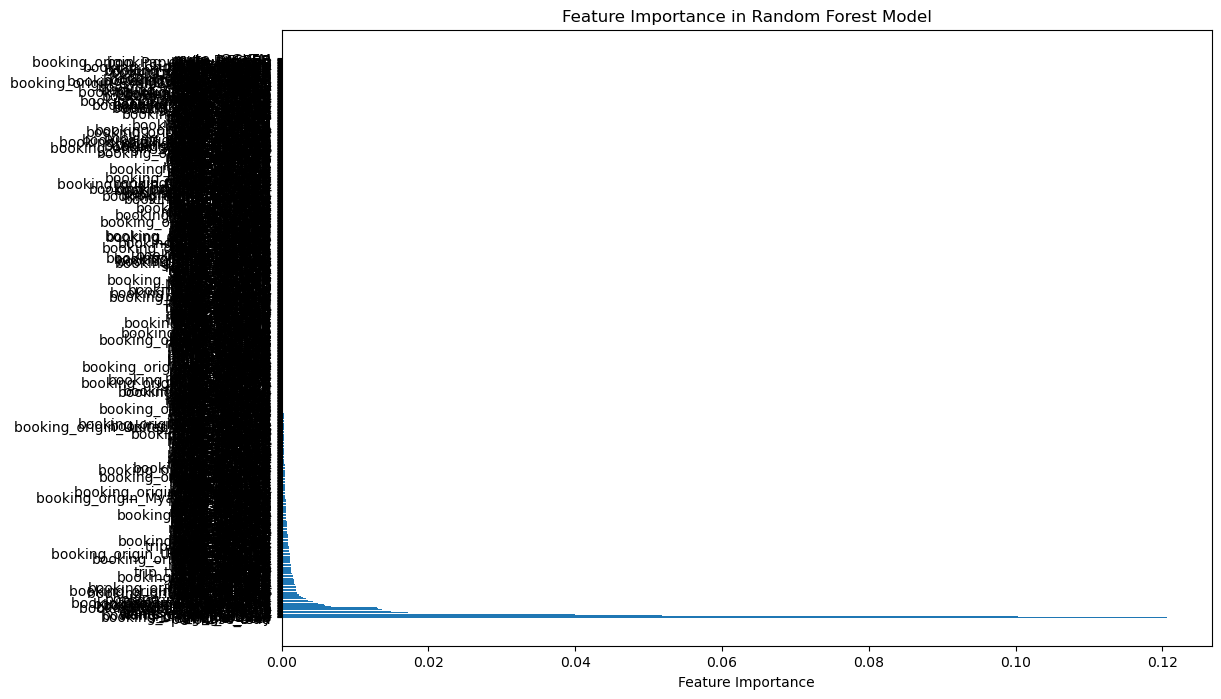

In [112]:
feature_importances = rf_model.feature_importances_


feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


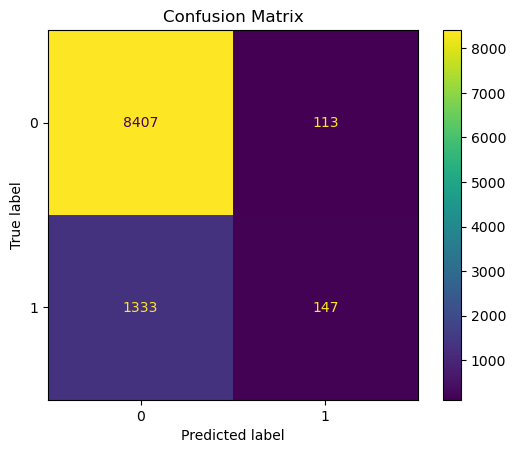

In [117]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [121]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Get precision-recall-threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find threshold for best F1 score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold for F1 Score: {best_threshold:.2f}")
print(f"F1 Score at Best Threshold: {f1_scores[best_idx]:.4f}")

# Predict with new threshold
y_pred_custom = (y_probs >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report with Custom Threshold:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))


Best Threshold for F1 Score: 0.18
F1 Score at Best Threshold: 0.4467
Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84      8520
           1       0.33      0.69      0.45      1480

    accuracy                           0.75     10000
   macro avg       0.63      0.72      0.64     10000
weighted avg       0.84      0.75      0.78     10000

Confusion Matrix:
 [[6450 2070]
 [ 459 1021]]


In [123]:
def predict_with_threshold(model, X, threshold=0.18):
    probs = model.predict_proba(X)[:, 1]
    return (probs >= threshold).astype(int)


In [125]:
from sklearn.metrics import roc_auc_score, average_precision_score

print("ROC AUC: ", roc_auc_score(y_test, y_probs))
print("Average Precision (PR AUC): ", average_precision_score(y_test, y_probs))


ROC AUC:  0.7859463424692298
Average Precision (PR AUC):  0.39089923464223075


### Model Deployment 


In [130]:
import joblib

# Save model
joblib.dump(best_model, 'rf_model.pkl')

# Store threshold separately if needed
with open('threshold.txt', 'w') as f:
    f.write(str(0.18))


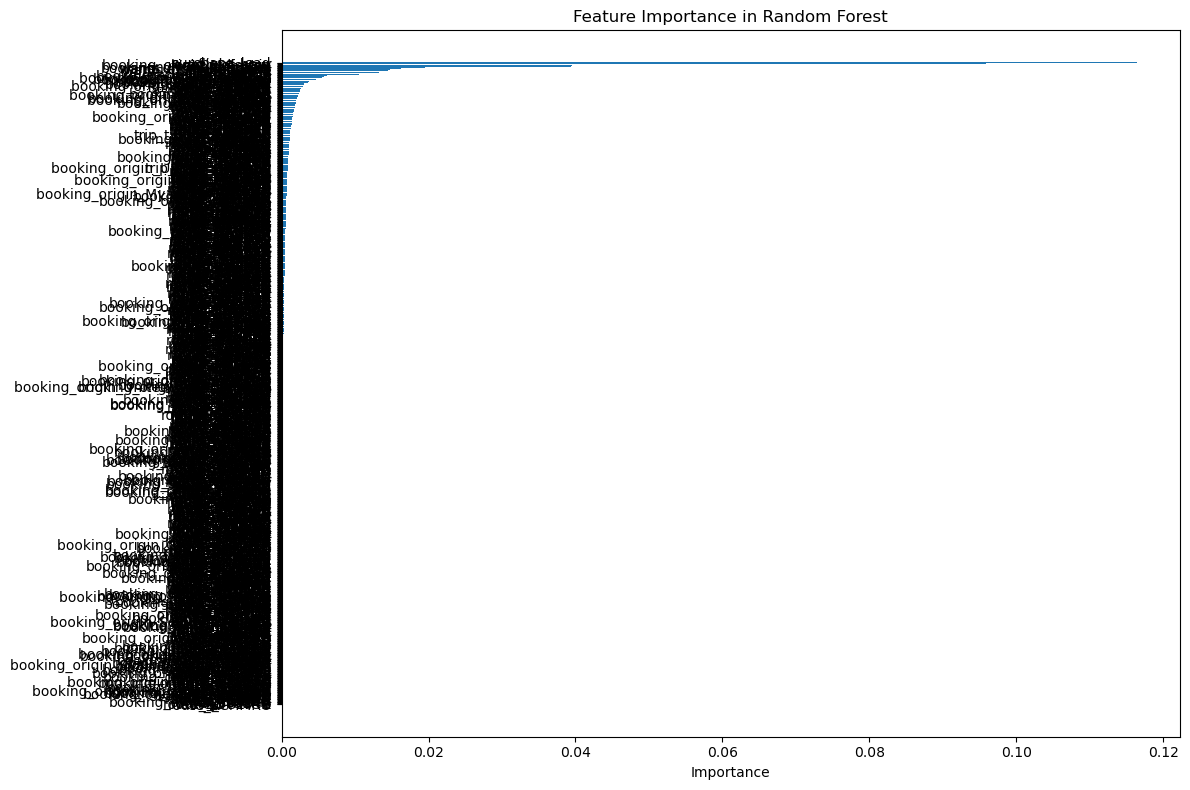

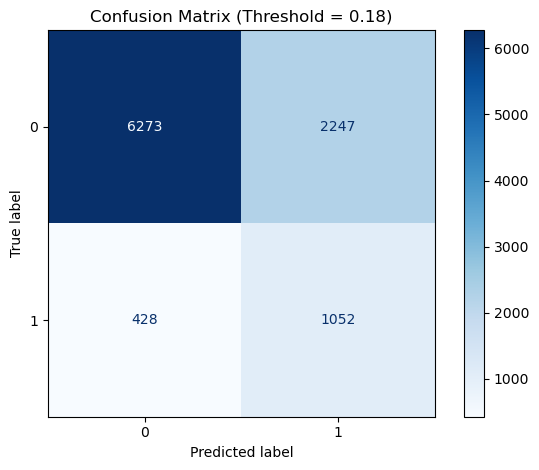

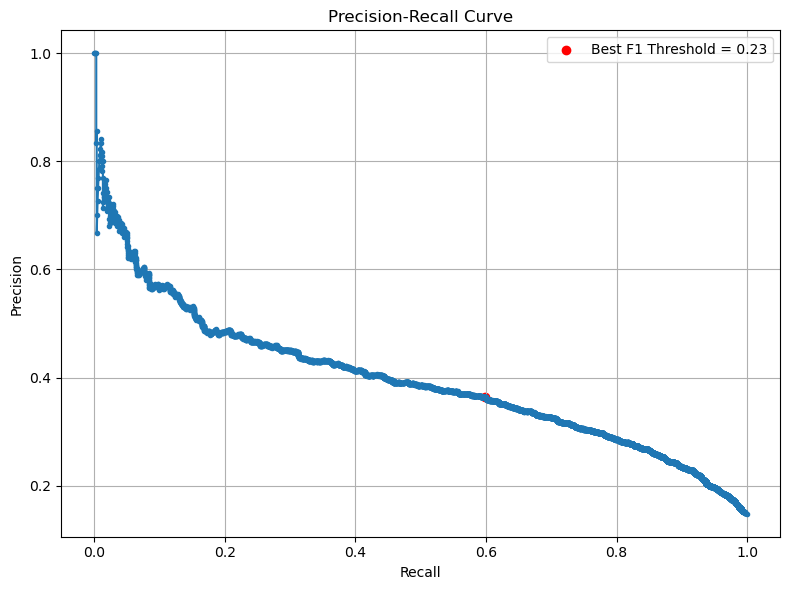

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# --- 1. Feature Importance Bar Chart ---
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(features[indices], importances[indices])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# --- 2. Confusion Matrix (using best_model & custom threshold) ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Using your chosen threshold
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_probs >= 0.18).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Threshold = 0.18)')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# --- 3. Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# Highlight best threshold point
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
plt.scatter(recall[best_idx], precision[best_idx], color='red', label=f'Best F1 Threshold = {thresholds[best_idx]:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('precision_recall_curve.png')
plt.show()


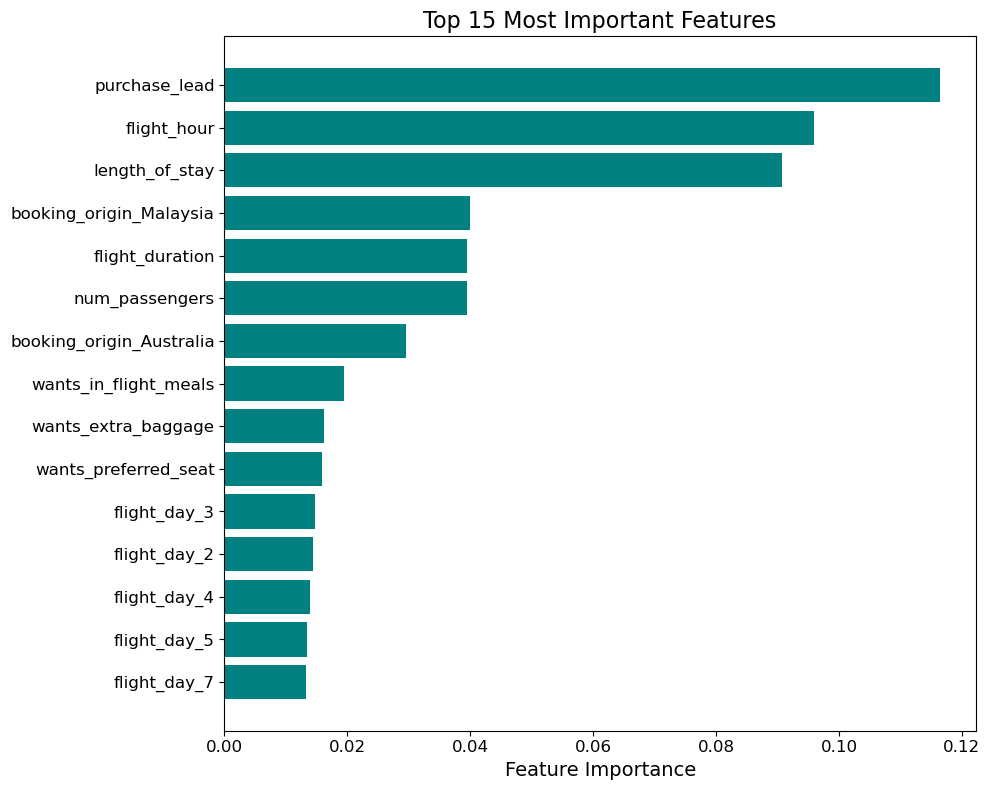

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create importance DataFrame
importances = best_model.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 15 features for clarity
top_n = 15
top_features = feature_df.head(top_n)

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='teal')
plt.xlabel('Feature Importance', fontsize=14)
plt.title(f'Top {top_n} Most Important Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('top_feature_importance.png')
plt.show()
